## Observations and Insights 

Capomulin and Ramicane were the most effective drugs in shrinking the tumor volume in mice tested.
Infubinol, and Ceftamin were not as effective as capomulin and Ramicane in shrinking the tumor volume in mice tested.
There seems to be a pozitive correlation between Mouse weight and average tumor volume
Naftisol and Stelasyn had effects similar to placebo, making them the least effective drugs amongst the drugs that were studied in this research.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files

mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [2]:
# Combine the data into a single dataset

combined_data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table for preview

combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.

combined_data_df["Mouse ID"].nunique()


249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Get all the data for the duplicate mouse ID. 

duplicated_MouseID = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_MouseID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = combined_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
cleaned_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame

cleaned_data.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1640
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_volume_mean = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_std = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_variance = tumor_volume_std ** 2
tumor_volume_SEM =cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_dataframe = ({"Mean Tumor Volume" : tumor_volume_mean,
                       "Meadian Tumor Volume" : tumor_volume_median,
                       "Std of Tumor Volume" : tumor_volume_std,
                       "Variance of Tumor Volume" : tumor_volume_variance,
                      "SEM of Tumor Volume" : tumor_volume_SEM})
summary_dataFrame = pd.DataFrame(summary_dataframe)
summary_dataFrame

,Mean Tumor Volume,Meadian Tumor Volume,Std of Tumor Volume,Variance of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.382993,50.783528,6.574208,43.220205,0.526358
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summaryStat = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ['mean', 'median', "std", "var", "sem"]})

summaryStat

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.382993  50.783528  6.574208  43.220205  0.526358
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

In [ ]:
summaryStat.to_csv('summaryStatistics.csv')

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

total_timepoints = cleaned_data.groupby("Drug Regimen")["Timepoint"].count()
total_timepoints = pd.DataFrame(total_timepoints)
total_timepoints



,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


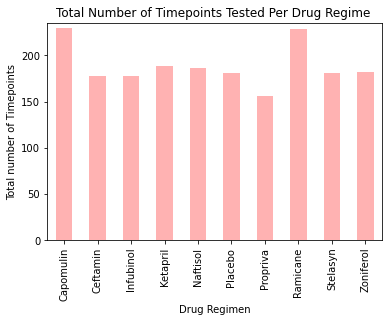

In [10]:
total_timepoints.plot.bar(color='r', alpha=0.3, align="center", legend=False)
plt.title("Total Number of Timepoints Tested Per Drug Regime ")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Timepoints")
plt.xlim(-0.5, len(total_timepoints.index)-0.5)
plt.ylim(0, max(total_timepoints["Timepoint"])+5)
plt.show()


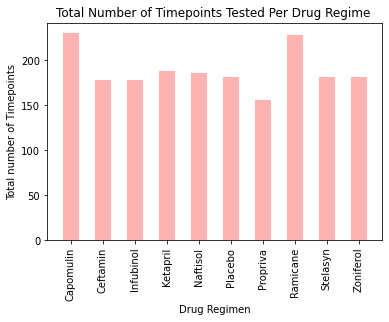

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(total_timepoints.index, total_timepoints["Timepoint"], color='r', alpha=0.3, align="center", width=0.5)
plt.title("Total Number of Timepoints Tested Per Drug Regime ")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of Timepoints")
plt.xticks(total_timepoints.index,rotation="vertical")

plt.show()



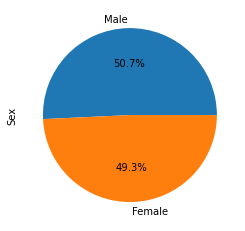

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

cleaned_data["Sex"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()



In [13]:
cleaned_data["Sex"].value_counts()

Male      958
Female    930
Name: Sex, dtype: int64

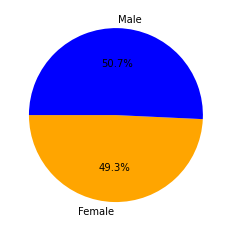

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [930, 958]

# The colors of each section of the pie chart
colors = ["orange", "blue"]

# Tells matplotlib not to separate any part of the pie
explode = (0, 0)

#
plt.pie(sizes, explode=explode, labels=labels, colors=colors, startangle=180, autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



drug_regimen= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

data = {}
for drug in drug_regimen:
    
    #Find the mouse ID and timepoint columns per drug used
    drug_data=cleaned_data.loc[cleaned_data["Drug Regimen"] == drug, ["Mouse ID", "Timepoint"]]
    
    #Group data by mouse ID, and find the max value of timepoint
    drug_data = drug_data.groupby("Mouse ID").max()
    
    #Change mouse ID from index back to a column 
    drug_data.reset_index()
    
    # Merge the new drug_data df with the original on Mouse ID and Timepoint columns to figure out the Tumor Volume for a particular row
    drug_data = pd.merge(cleaned_data, drug_data, how='inner', on=['Mouse ID','Timepoint'])
    
    #Use mouse ID and Tumor volume columns from the merged drug_data df and add to the dictionary data, using the drug as key.
    data[drug]=drug_data[["Mouse ID","Tumor Volume (mm3)"]]

In [ ]:


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in data:

    quartiles = data[drug]["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {drug} data is: {lowerq:.2f}")
    print(f"The upper quartile of {drug} data is: {upperq:.2f}")
    print(f"The interquartile range of {drug} data is: {iqr:.2f}")
    print(f"The the median of {drug} data is: {quartiles[0.5]:.2f} ")
    print("----------------------------")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound:.2f} could be outliers.")
    print(f"Values above {upper_bound:.2f} could be outliers.")
    print("=============================")

    
    

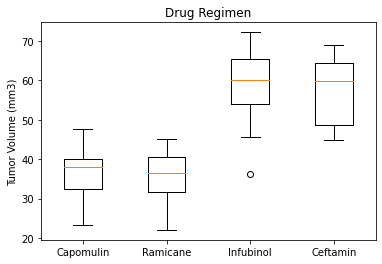

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_1 = [data[drug]['Tumor Volume (mm3)'] for drug in data]
#for drug in data:
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data_1)
ax1.set_xticklabels(drug_regimen)
plt.show()

## Line and Scatter Plots

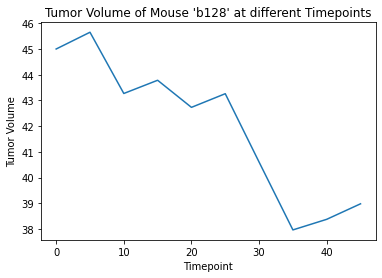

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Group the data by Drug regime, Mouse ID and Timepoint,so that I will have timepoint as index when I choose capomulin and mouse for that drug 
x=cleaned_data.groupby(["Drug Regimen", "Mouse ID", "Timepoint"]).max()
capomulin_data=x.loc["Capomulin", "b128"]
capomulin_data


capomulin_data.plot.line(y="Tumor Volume (mm3)", legend=False)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume of Mouse 'b128' at different Timepoints")
plt.show()

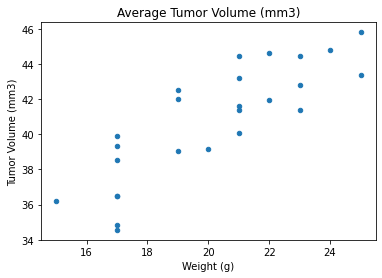

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Group the data by Drug regimen and Mouse ID
x=cleaned_data.groupby(["Drug Regimen", "Mouse ID"]).mean()

# Get data that belongs to Capomulin treatment only
capomulin_data=x.loc["Capomulin"]
capomulin_data

# Make a scatter plot with Weight on X axis and Tumor Volume on Y axis
capomulin_data.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", title="Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The r-squared is: 0.7088568047708717


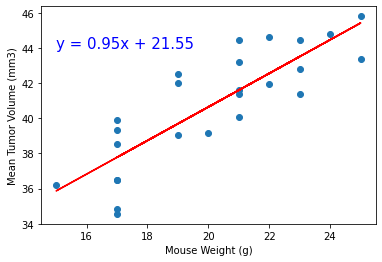

In [19]:
# Calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_data = capomulin_data["Weight (g)"]
y_data = capomulin_data["Tumor Volume (mm3)"]
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Mean Tumor Volume (mm3)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_data,y_data)
plt.plot(x_data,regress_values,"r-")
plt.annotate(line_eq,(15,44),fontsize=15,color="blue")
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [20]:
#Calculate the correlation coefficient

correlation = st.pearsonr(x_data,y_data)
print(f"The correlation between Mouse weight and average Tumor Volume is {round(correlation[0],2)}")



The correlation between Mouse weight and average Tumor Volume is 0.84
